# Vežbe 2 - OCR (Optical character recognition)

Cilj ovih vežbi je implementacija osnovne verzije OCR-a i upoznavanje sa Keras okruženjem za rad sa neuronskim mrežama.

* Keras - Python biblioteka za laku implementaciju neuronski mreža (http://keras.io/)



### Tok aktivnosti implementacije OCR - a 

Tok aktivnosti predstavlja korake koje je potrebno izvršiti prilikom implementacije OCR-a.

<img src="images/Tok aktivnosti.png">

### Početak implementacije
Skup biblioteka sa prethodnih vežbi smo proširili Keras bibliotekom za rad sa neuronskim mrežama.

In [19]:
#import potrebnih biblioteka
%matplotlib inline
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import collections
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

### Korak 1 - 3
Ovi koraci su detaljno objašnjeni na prethodnim vežbama, tako da neće biti dodatno objašnjavani

In [20]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def image_bin(image_gs):
    height, width = image_gs.shape[0:2]
    image_binary = np.ndarray((height, width), dtype=np.uint8)
    ret,image_bin = cv2.threshold(image_gs, 127, 255, cv2.THRESH_BINARY)
    return image_bin
def invert(image):
    return 255-image
def display_image(image, color= False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')
def dilate(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)
def erode(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)

### Korak 4 -  izdvajanje regiona od interesa

U ovom koraku potrebno je izdvojiti samo regione(konture) od interesa. Potrebno je označiti regione od interesa na slici i napraviti listu slika od regiona koja će kasnije biti ulaz za neuronsku mrežu.

### TODO 1
* Označiti regione od interesa na originalnoj slici.
* Za svaki region napraviti posebnu sliku dimenzija 28 x 28. 
* Za označavanje regiona koristiti metodu cv2.boundingRect(contour).
* Kao povratnu vrednost vratiti originalnu sliku na kojoj su obeleženi regioni i niz slika koje predstavljaju regione sortirane  po rastućoj vrednosti x ose

### TODO 2
Za potrebe TODO 1 implementirati funkciju za promenu veličine slike na 28 x 28


In [21]:
#TODO 2 
def resize_region(region):
    '''Transformisati selektovani region na sliku dimenzija 28x28'''
    resized = np.array((28,28), np.float32)
    return resized
#TODO 1
def select_candidates(original, image_bin):
    '''Oznaciti regione od interesa na originalnoj slici.
        Za svaki region napraviti posebnu sliku dimenzija 28 x 28. 
        Za označavanje regiona koristiti metodu cv2.boundingRect(contour).
        Kao povratnu vrednost vratiti originalnu sliku na kojoj su obeleženi regioni
        i niz slika koje predstavljaju regione sortirane po rastućoj vrednosti x ose
    '''
    img, contours, hierarchy = cv2.findContours(image_bin.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    regions_dic = {}
    sorted_regions = [] ## lista sortiranih regiona po x osi
    for contour in contours: 
        x,y,w,h = cv2.boundingRect(contour) #koordinate graničnog pravougaonika
        area = cv2.contourArea(contour)
        if area > 100 and h < 100 and h>15 and w>20:
            #kopirati [y:y+h+1,x:x+w+1] sa binarne slike i smestiti u novu sliku
            #regions_dic[x] = resize_region(region)       
            #označiti region pravougaonikom na originalnoj slici
    #sortirati sve regione i smestiti u promenljivu sorted_regions
    return original, sorted_regions

## Korak 5

Regioni od interesa su predstavljeni vektorom čiji su elementi matrice dimenzija 28x28. Elementi matrica su vrednosti 0 ili 255. Potrebno je skalirati vrednosti elemenata matrice na opseg od 0 do 1, kako bi se pogodio linearni deo sigmoid funkcije i smanjilo vreme obučavanja.
Nakon skaliranja matrice je potrebno transformisati u vektor od 784 elementa.

##TODO 3

Skalirati sve elemente matrice na opseg od 0 do 1

##TODO 4 

Svaki skalirani region transformisati u vektor od 784 elementa.

##TODO 5

Konvertovati azbuku u niz pogodan za obučavanje NM, odnosno niz čiji su svi elementi 0 osim elementa čiji je indeks jednak indeksu elementa iz alfabeta za koji formiramo niz.
Primer prvi element iz azbuke [1,0,0,0,0,0,0,0,0,0], za drugi [0,1,0,0,0,0,0,0,0,0] itd..



In [22]:
#TODO 3
def scale_to_range(image): #skalira elemente slike na opseg od 0 do 1
    ''' Elementi matrice image su vrednosti 0 ili 255. 
         Potrebno je skalirati sve elemente matrica na opseg od 0 do 1
    '''
    return image
#TODO 4
def prepare_for_NN(regions):
    '''Regioni su matrice dimenzija 28x28 čiji su elementi vrednosti 0 ili 255.
        Potrebno je skalirati svaki region i transformisati ga u vektor od 784 elementa '''
    ready = []
    for region in regions:
        #skalirati region
        #pretvoriti skaliran u vektor
        #vektor dodati u listu spremnih regiona
    return ready
#TODO 5
def convert_output(outputs):
    '''Konvertovati azbuku u niz pogodan za obučavanje NM,
        odnosno niz čiji su svi elementi 0 osim elementa čiji je
        indeks jednak indeksu elementa iz alfabeta za koji formiramo niz.
        Primer prvi element iz azbuke [1,0,0,0,0,0,0,0,0,0],
        za drugi [0,1,0,0,0,0,0,0,0,0] itd..
    '''
    nn_outputs = []
    return nn_outputs

##Korak 6

### Neuronska mreža

Veštačka neuronska mreža se sastoji od 784 ulazna neurona, 128 neurona u skrivenom sloju i 10 neurona na izlazu. Zašto baš 784 neurona na ulazu i 10 neurona na izlazu? Regione smo transformisali prvo na matricu dimenzija 28x28,a zatim u vektor od 784 elementa. Što se tiče 10 neurona na izlazu, to je posledica broja znakova u alfabetu. U našem primeru alfabet (0,1,2,3,4,5,6,7,8,9) ima 10 elemenata pa nam je potrebno 10 neurona na izlazu.
Neuronska mreža je implementirana pomoću Keras biblioteke.
<img src="images/neuronska_mreza.png">

In [23]:
def NN_train(X_train, y_train):
    '''Implementacija veštačke neuronske mreže sa 784 neurona na uloznom sloju,
        128 neurona u skrivenom sloju i 10 neurona na izlazu. Aktivaciona funkcija sigmoid
    '''
    X_train = np.array(X_train, np.float32)
    y_train = np.array(y_train, np.float32)
    model = Sequential()
    model.add(Dense(input_dim=784, output_dim=128,init="glorot_uniform"))
    model.add(Activation("sigmoid"))
    model.add(Dense(input_dim=128, output_dim=10,init="glorot_uniform"))
    model.add(Activation("sigmoid"))

    sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)

    model.fit(X_train, y_train, nb_epoch=2000, batch_size=1, verbose = 0,shuffle=False,show_accuracy = False)#obučavanje
    score = model.evaluate(X_train, y_train, batch_size=1) #test obučenosti mreže
    
      
    return model

##Korak 7 - određivanje pobednika

Određivanje pobedničkog neurona. Pobednički neuron je neuron čija je aktivaciona vrednost najveća. Npr ako imamo dva neurona sa aktivacionim vrednostima 0.3 i 0.89, pobednik je drugi 0.89.

##TODO 6

Pronaći indeks neurona koji je najviše pobuđen.


In [24]:
#TODO 6
def winner(outputs):
    '''pronaći indeks neurona koji je najviše pobuđen'''
    return 0

##Korak 8 - prikaz rezultata

## TODO 7

Pikazati rezultat prepoznavanja neuronske mreže. Za svaki rezultat pronaći indeks pobedničkog  neurona koji ujedno predstavlja i indeks prepoznatog elementa  u azbuci. Dodati karakter iz azbuke u result

In [25]:
def display_result(results, data):
    '''za svaki rezultat pronaći indeks pobedničkog
        regiona koji ujedno predstavlja i indeks u azbuci.
        Dodati karakter iz azbuke u result'''
    result = []
   
    return result

## Start
Učitati sliku za obučavanje veštačke neuronske mreže. Transformisati sliku i binarni oblik i označiti regione od interesa (u ovom slučaju to su brojevi od 0 do 9).
Prikazati sliku sa označenim regionima od interesa.

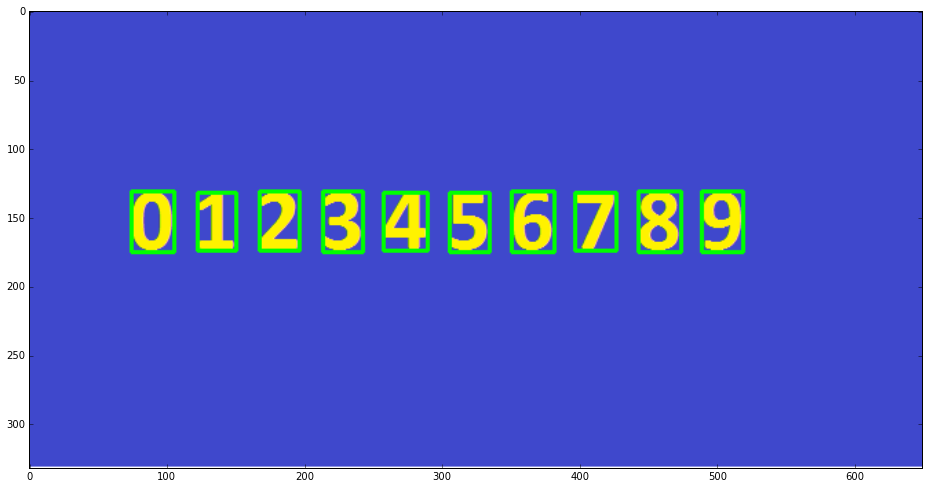

In [26]:
image_color = load_image('images/brojevi.png')
img = invert(image_bin(image_gray(image_color)))
img_bin = erode(dilate(img))
selected_regions, numbers = select_candidates(image_color.copy(),img)
display_image(selected_regions)


In [27]:
#insert alphabet here
alphabet = [0,1,2,3,4,5,6,7,8,9]


In [28]:
inputs = prepare_for_NN(numbers)
outputs = convert_output(alphabet)
model = NN_train(inputs, outputs)


10/10 [==============================] - 0s     


### Verifikacija i primer predikcije

Za verifikaciju obučenosti neuronske mreže ćemo uzeti drugi i treći ulazni vektor.
Metoda **model.predict** kao ulazni parametar prima niz vektora dimenzija 784.
Rezultat **predict** metode je niz vektora dimenzije 10, koji sadrži koeficijente pobuđenosti.

In [29]:
result = model.predict(np.array(inputs[2:4], np.float32))
print result
print display_result(result, alphabet)

[[ 0.02413901  0.0320185   0.93956771  0.02744579  0.020033    0.00240146
   0.00444151  0.03305372  0.02342487  0.01404112]
 [ 0.01383339  0.01977533  0.02724099  0.93770494  0.01645151  0.0321089
   0.00598104  0.0180957   0.03438113  0.02691579]]
[2, 3]


## TODO 8

Učitati sliku za testiranje rada OCR -a  'images/test.png'. Transformisati sliku u oblik pogodan za ulaz u neuronsku mrežu. 
Prikazati rezultate predikcije kao i sliku sa označenim regionima od interesa.

PSEUDO KOD:
* učitati sliku 'images/test.png'
* pretvoriti sliku u binarnu i ako je potrebno invertovati je
* ako je potrebno primeniti eroziju i/ili diletaciju
* selektovati regione od značaja
* pripremiti podatke za ulaz na NM
* pozvati metodu **predict**, a kao parametar proslediti pripremljene podatke
* prikazati rezultate predikcije


[2, 3, 5, 6, 8, 9, 1, 0]


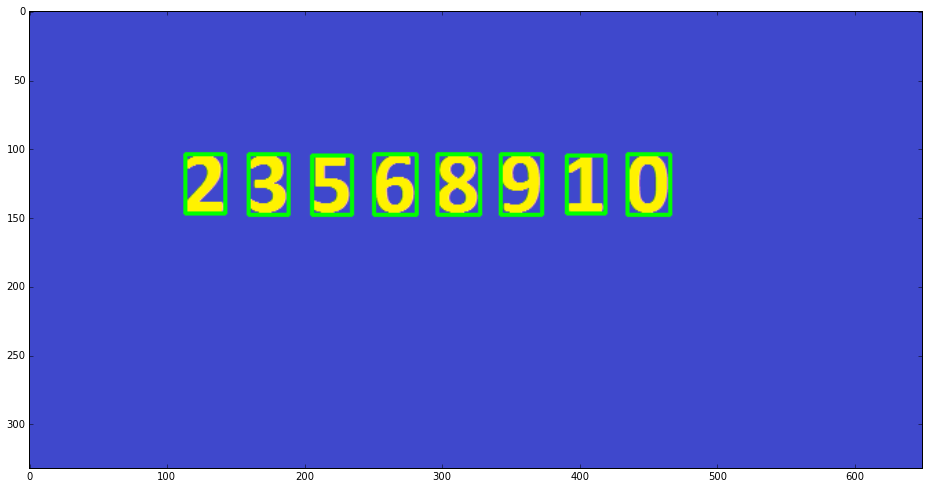

In [30]:
#TODO 8

### TODO dodatno

Implementirati kalkulator. Azbuka za kalkulator i test primeri se nalaze u folderu images

In [ ]:
#kalkulator